## **Handling Missing Data - Complete Case Analysis (CCA)**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
jobs_df = pd.read_csv('D:/Academics/AI/Simplilearn/Data Sets/CampusX/DS jobs.csv')

In [49]:
jobs_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [50]:
jobs_df.shape

(19158, 13)

**Finding the percentage of missing data from the columns**

In [51]:
jobs_df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [52]:
cols = [var for var in jobs_df.columns if jobs_df[var].isnull().mean() < 0.05 and jobs_df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [53]:
jobs_df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


Now we will calculate if we drop the rows from the columns which have 0 - 5% of the data missing, then what % of data will be remaining

In [54]:
len(jobs_df[cols].dropna()) / len(jobs_df) *100

89.68577095730244

In [55]:
new_jobs_df = jobs_df[cols].dropna()
jobs_df.shape, new_jobs_df.shape

((19158, 13), (17182, 5))

<Axes: >

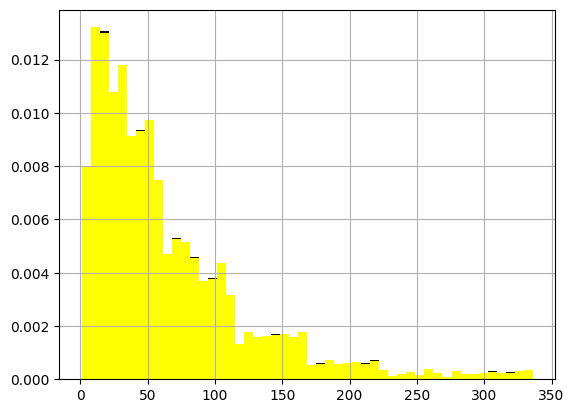

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
jobs_df['training_hours'].hist(bins=50, ax=ax, density=True, color = 'black')

# After CCA
new_jobs_df['training_hours'].hist(bins=50, ax=ax, density=True, color='yellow')

<Axes: ylabel='Density'>

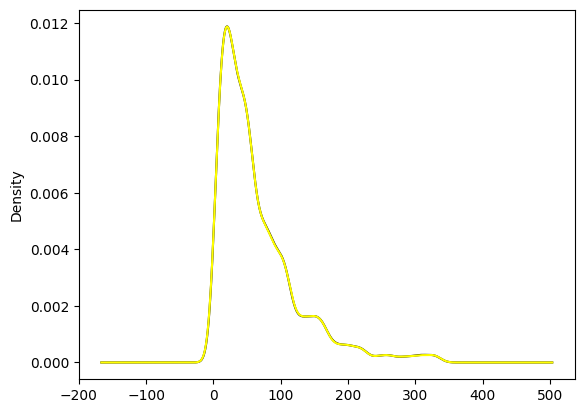

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
jobs_df['training_hours'].plot.density(color='black')

# data after cca
new_jobs_df['training_hours'].plot.density(color='yellow')

<Axes: >

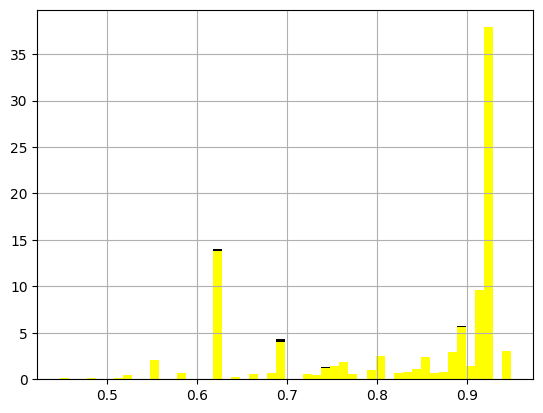

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
jobs_df['city_development_index'].hist(bins=50, ax=ax, density=True, color = 'black')

# After CCA
new_jobs_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='yellow')

<Axes: ylabel='Density'>

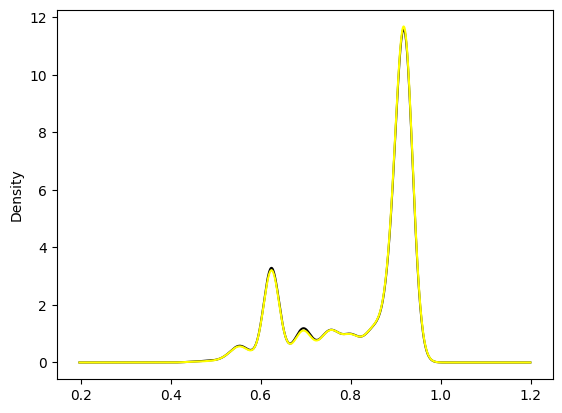

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
jobs_df['city_development_index'].plot.density(color='black')

# data after cca
new_jobs_df['city_development_index'].plot.density(color='yellow')

<Axes: >

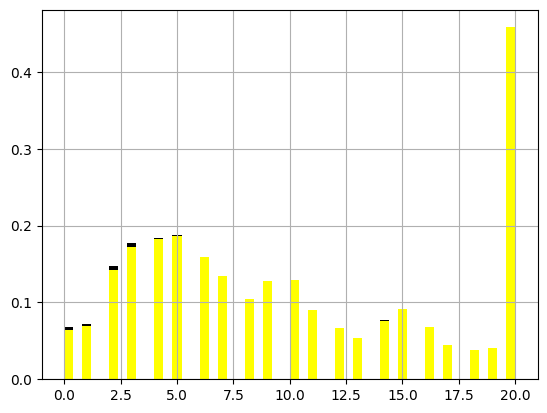

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
jobs_df['experience'].hist(bins=50, ax=ax, density=True, color = 'black')

# After CCA
new_jobs_df['experience'].hist(bins=50, ax=ax, density=True, color='yellow')

<Axes: ylabel='Density'>

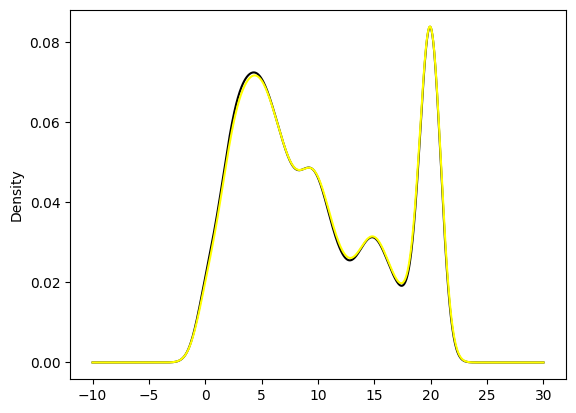

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
jobs_df['experience'].plot.density(color='black')

# data after cca
new_jobs_df['experience'].plot.density(color='yellow')

**Performing CCA on Categorical columns**

In [62]:
jobs_df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [63]:
jobs_df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [66]:
cat_df = pd.concat([jobs_df['enrolled_university'].value_counts()/len(jobs_df), 
                    new_jobs_df['enrolled_university'].value_counts()/ len(new_jobs_df)], axis=1)*100

In [67]:
cat_df.columns = ['Original', 'CCA']
cat_df

,Original,CCA
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [68]:
cat_df = pd.concat([jobs_df['education_level'].value_counts()/len(jobs_df), 
                    new_jobs_df['education_level'].value_counts()/ len(new_jobs_df)], axis=1)*100

In [69]:
cat_df.columns = ['Original', 'CCA']
cat_df

,Original,CCA
education_level,,
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713


**As we can see from the above results there is only a small difference in the results after performing CCA**